In [1]:
import pyemu,os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from variables import *

In [2]:
baseModelPath = os.path.join(pestPath,'base')
tmpModPath = os.path.join(pestPath,'tmp')
multirunPath = os.path.join(pestPath,'multirun')

pstFilePath = os.path.join(tmpModPath,pstFile)
basePath = os.path.join(auxPath,F'{ws}.gpkg')

In [3]:
pst = pyemu.Pst(pstFilePath)
obsData = pst.observation_data.obsval.values
obsDataCols = pd.to_datetime(pst.observation_data.idx0).sort_values().index.to_list()

In [4]:
df = pd.read_csv(os.path.join(multirunPath,'master',F"{ws.lower()}.phi.actual.csv"))
df

,iteration,total_runs,mean,standard_deviation,min,max,0,1,2,3,...,90,91,92,93,94,95,96,97,98,base
0,0,100,5.272280e+11,6.102440e+10,4.679650e+11,7.720430e+11,5.363870e+11,4.719800e+11,5.143080e+11,4.803800e+11,...,5.101090e+11,6.003490e+11,4.806740e+11,4.760740e+11,4.740660e+11,4.728990e+11,4.709850e+11,4.865530e+11,5.268550e+11,4.989050e+11
1,1,232,4.809540e+11,4.270480e+09,4.710330e+11,4.897500e+11,4.789640e+11,4.737910e+11,4.817750e+11,4.849700e+11,...,4.833070e+11,4.774540e+11,4.842220e+11,4.792270e+11,4.806650e+11,4.793870e+11,4.763570e+11,4.863980e+11,4.777050e+11,4.807130e+11
2,2,364,4.717400e+11,6.094770e+08,4.708440e+11,4.743020e+11,4.717570e+11,4.721950e+11,4.721980e+11,4.716520e+11,...,4.714980e+11,4.718070e+11,4.718540e+11,4.715410e+11,4.712860e+11,4.718700e+11,4.712700e+11,4.711940e+11,4.711030e+11,4.714880e+11
3,3,496,4.670110e+11,2.658800e+07,4.669490e+11,4.671020e+11,4.670110e+11,4.670500e+11,4.670000e+11,4.670010e+11,...,4.670260e+11,4.670470e+11,4.670050e+11,4.670090e+11,4.670070e+11,4.670050e+11,4.670120e+11,4.670190e+11,4.669900e+11,4.669850e+11
4,4,628,4.669340e+11,4.992910e+06,4.669130e+11,4.669440e+11,4.669350e+11,4.669330e+11,4.669370e+11,4.669360e+11,...,4.669380e+11,4.669320e+11,4.669340e+11,4.669350e+11,4.669360e+11,4.669370e+11,4.669350e+11,4.669340e+11,4.669400e+11,4.669390e+11
5,5,760,4.669050e+11,2.830160e+06,4.668970e+11,4.669110e+11,4.669040e+11,4.669000e+11,4.669050e+11,4.669060e+11,...,4.669080e+11,4.668990e+11,4.669070e+11,4.669080e+11,4.669050e+11,4.669040e+11,4.669050e+11,4.669060e+11,4.669050e+11,4.669080e+11


Text(0.5, 0, 'model runs')

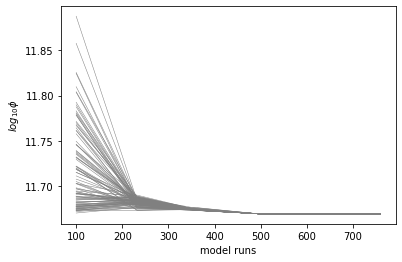

In [5]:
fig,ax = plt.subplots(1,1)
_ = [ax.plot(df.total_runs,np.log10(df.loc[:,i].values),"0.5",lw=0.5) for i in df.columns[6:]]
ax.set_ylabel("$log_{10}\\phi$")
ax.set_xlabel("model runs")

In [6]:
outPhi =df.loc[df.iteration==df.iteration.max(),df.columns[6:]].min(axis=1)
print(F"Max iteration: {df.iteration.max()}\nReal w min Phi: {outPhi.index.item()}\nMin Phi: {outPhi.item()}")

Max iteration: 5
Real w min Phi: 5
Min Phi: 466897000000.0


In [7]:
obs_plus_noise = pyemu.ObservationEnsemble.from_csv(pst=pst,filename=os.path.join(multirunPath,'master',F'{ws.lower()}.obs+noise.csv'))
pr_oe = pyemu.ObservationEnsemble.from_csv(pst,os.path.join(multirunPath,'master',F'{ws.lower()}.0.obs.csv'))
pt_oe = pyemu.ObservationEnsemble.from_csv(pst,os.path.join(multirunPath,'master',F'{ws.lower()}.5.obs.csv'))

In [8]:
base_pt_oe = pt_oe.loc['base',obsDataCols]
best_pt_oe = pt_oe.loc['4',obsDataCols]

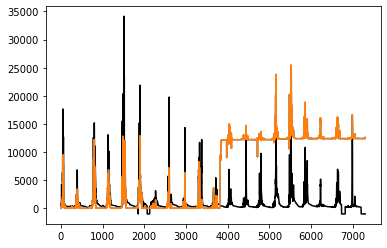

In [23]:
#pt_oe.loc[:5,obsColsSort]
fig,ax=plt.subplots()
ax.plot(obsData,color='black')
ax.plot(base_pt_oe.values)
ax.plot(best_pt_oe.values)
# for idx in pt_oe.index:
#     ax.plot(pt_oe.loc[idx,obsDataCols].values)

In [15]:
#pst.pestpp_options["ies_no_noise"] = False